# Feature preprocessing and feature generation

This notebook contains notes about feature preprocessing and feature generation. We cover the following videos:
   
- Overview
- Numeric Features
- Categorical and Ordinal Features
- Datetime and Coordinates
- Handling Missing Values
- Feature Preprocessing and Generation with Respect to Models

## Overview

## Numeric Features

In [ ]:
continua con las notas y ejemplos del curso

### Summary

In this section, we have discussed numeric features. 


- **Numeric feature preprocessing is different for tree and non-tree models** The impact of feature preprocessing is different for different models (e.g. tree-based models vs non-tree-based models).
    - Tree-based models does not depend on scaling. For instance, a tree-based model will work in a dataset with two variables, `a` and `b`, with ranges `a in [0,1]` and `b in [0, 1000]`.
    - Non-tree-based models hugely depend on scaling. Algorithms like neural networks, kNN, and linear models will face trouble to work with variables like `a in [0,1]` and `b in [0, 1000]`.
    
    
- **Most often used preprocessing techniques are**:
    - MinMaxScaler. Transforms the input range to [0, 1]
    - StandardScaler. Transforms the mean and std of the data to `mean==0` and `std==1`.
    - Rank. Sets spaces between sorted values to be equal.
    - `np.log(1 + x)` and `np.sqrt(1+x)`.
    
    
- **Feature generation is powered by our understanding of the data**

## Categorical and Ordinal Features


In this section, we cover categorial can ordinal features, especifically:

- What is the difference between categorical and ordinal features.
- How to preprocess categorical and ordinal features depending on the model (linear regression, kNN, neural net, decision tree, etc).
- How to generate new features from existing features.

### Interval, ordinal, and categorical values

From [Deep Learining with PyTorch]:

**Continuous values** are strictly ordered, and a difference between various values has a strict meaning. If you are counting or measuring something with units, the valye probably is a continuous value. Example: given a package A of 2 kg and a package B of 3.5 kg, we know that package B is heavier than package A, and its difference is 1.5 kg.

**Ordinal values** have ordering meaning but do not have numerical meaning. The strict ordering of continuous values remains, but the fixed relationship between values no longer applies. Example: a cup of coffee comes in three sizes, small, medium and large. We know how to order them, that is, small < medium < large. However, we do not anything about the difference between them (how much bigger it is a large cup with respect to a small cup). We could map those three values to numbers, small=1, medium=2, and large=3. However, we cannot do math with those values (adding 1+2 does not result in a large cup). Alternatively, you could use the actual volumes of each size, say small=8, medium=12, and large=24 fluid onces. That way, you will know how much larger is a medium cup with respect to a small cup.

**Categorical values** have neither ordering nor numerical meaning. These values are often enumerations of possibilities, assigned to arbitraty numbers. Example: water=1, coffee=2, soda=3, milk=4. Placing water first and milk last has no real logic, you simply need distinct values to differentiate them. You could assign coffee to 10 and milk to -3 with no significant change (although assigning values in the range 0..N-1 will have advantages when using one-hot encoding).



**Update** From this [post](https://www.kaggle.com/residentmario/univariate-plotting-with-pandas), I think that categorical features are divided into ordinal and nominal. An **ordinal feature** have ordering meaning but do not have numerical meaning. A **nominal feature** have neither ordering nor numerical meaning.

In [3]:
import numpy as np
import pandas as pd

# load dataset
train = pd.read_csv("../datasets/titanic/train.csv")
test = pd.read_csv("../datasets/titanic/test.csv")

# show some rows
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# show columns of the dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Categorical features** The following table shows categorial features in the dataset: `Sex`, `Cabin`, and `Embarked`.

**Ordinal features** There is a special feature called `Pclass`, which stands for ticket class. This feature has three unique values: 1, 2, and 3.

In [22]:
ids_feat = ["PassengerId", "Survived", "Name"]     # id features, only to complement the dataframe
cat_feat = ["Sex", "Cabin", "Embarked"]            # categorical features
ord_feat = ["Pclass"]                              # ordinal features 
train[ids_feat + ord_feat + cat_feat].head(7)

PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   
5            6         0                                   Moran, Mr. James   
6            7         0                            McCarthy, Mr. Timothy J   

   Pclass     Sex Cabin Embarked  
0       3    male   NaN        S  
1       1  female   C85        C  
2       3  female   NaN        S  
3       1  female  C123        S  
4       3    male   NaN        S  
5       3    male   NaN        Q  
6       1    male   E46        S

**A note about ordinal features (`Pclass`)** `Pclass`  it is ordinal. This means that is is ordered in some meaningful way. For example, we know that the first class (`Pclass=1`) is more expensive than the second class (`Pclass=2`). Although, we do not how much expensive. 

Let us make an important note about the difference between ordnial and numeric features. If `Pclass` would have been a numeric feature, we could say that the difference between the first and the second class (1-2) is equal to the difference between the second and the third class (2-3). Although, since `Pclass` is ordinal, we don't know which difference is bigger.

Other examples for ordinal features are:

- Ticket class: 1, 2, 3
- Driver's license: A, B, C, D
- Level of education: kindergarden, school, undergraduate, bachelor, master, doctoral
    
    
These categories are sorted in increasingly order of complexity, which can be useful for a machine learning algorithm.

Let's see the values for each categorical feature:

In [7]:
train["Pclass"].value_counts()   # ordinal feature

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
train["Sex"].value_counts()  # categorical feature

male      577
female    314
Name: Sex, dtype: int64

In [19]:
train["Embarked"].value_counts() # categorical feature

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
train["Cabin"].value_counts()  # categorical feature

B96 B98            4
C23 C25 C27        4
G6                 4
C22 C26            3
E101               3
F33                3
F2                 3
D                  3
B18                2
B51 B53 B55        2
E67                2
C65                2
B5                 2
B49                2
B57 B59 B63 B66    2
C124               2
D26                2
E8                 2
C68                2
D33                2
D36                2
C123               2
C2                 2
E25                2
F4                 2
B58 B60            2
D20                2
E33                2
B77                2
C125               2
                  ..
E17                1
B82 B84            1
D48                1
E50                1
D49                1
B41                1
B50                1
E77                1
E63                1
B78                1
B39                1
B42                1
C7                 1
C86                1
C49                1
A6                 1
E10          

As it can be seen, `Pclass`, `Sex`, and `Embarked` have a small number of values whereas `Cabin` has a lot of them. Below we create a few plots to get a better idea of the proportions of each categorial feature.

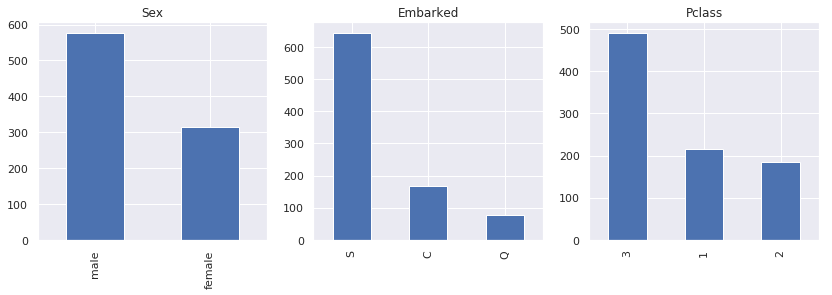

In [38]:
import matplotlib.pyplot as plt

features = ["Sex", "Embarked", "Pclass"]  # do not use 'Cabin', use a single plot for that feature

fig, ax = plt.subplots(1, len(features), figsize=(14, 4))

for feat, ax in zip(features, ax.flat):
    train[feat].value_counts().plot(kind="bar", title=feat, ax=ax)

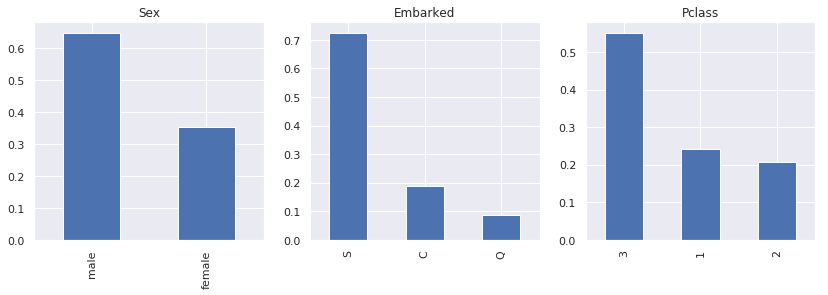

In [39]:
import matplotlib.pyplot as plt

features = ["Sex", "Embarked", "Pclass"]  # do not use 'Cabin', use a single plot for that feature

fig, ax = plt.subplots(1, len(features), figsize=(14, 4))

for feat, ax in zip(features, ax.flat):
    
    n_records = train[feat].value_counts().sum()
    (train[feat].value_counts() / n_records ).plot(kind="bar", title=feat, ax=ax);

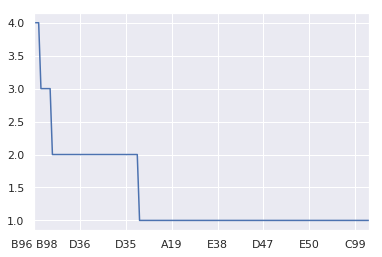

In [40]:
train["Cabin"].value_counts().plot.line();

From the previous plot, we can see that the value with the largest frequency is `B96`. We can confirm this by using this line:

In [48]:
train["Cabin"].value_counts()[:5]

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
Name: Cabin, dtype: int64

In [49]:
train["Cabin"].value_counts().nlargest()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
Name: Cabin, dtype: int64

### Label Encoding

Now, let's talk about encoding features. The simplest way to encode a categorical feature is to map its unique values to different numbers. This procesure is called **Label Encoding**. 


**Note** Label encoding it is recommended for tree-based methods, because tree-based methods can split features and extract most of the useful values in categories on its own. **Label encoding is not recommended for non-tree-based methods.**

We first use `LabelEncoder`:

In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = le.fit_transform(train["Embarked"].dropna())
data[:10]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0])

In [52]:
le.inverse_transform(data[:10])

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C'], dtype=object)

**Note** `LabelEncoder` encodes unique values in alphabetical order. In the previous example, the mapping is as follows:
- `0` -> `'C'`
- `1` -> `'Q'`
- `2` -> `'S'`

In [53]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

We can also use `pandas.factorize` to encode values:

In [56]:
codes, uniques = pd.factorize(train["Embarked"].dropna())

In [58]:
codes[:10]

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 1])

In [59]:
uniques

Index(['S', 'C', 'Q'], dtype='object')

**Note** `pd.afactorize` encodes unique values in order of appareance. In the previous example, the mapping is as follows:
- `0` -> `'S'`
- `1` -> `'C'`
- `2` -> `'Q'`

You can confirm this by displaying the first six rows of the dataframe:

In [62]:
train["Embarked"][:6]

0    S
1    C
2    S
3    S
4    S
5    Q
Name: Embarked, dtype: object

It is worth to mention that `pd.factorize` can handle NaN values, so we may want to remove `df.dropna()`. As a result, NaN entries are replaced with `-1`. Also, note that `-1` does not appear in `uniques`: 

In [67]:
codes, uniques = pd.factorize(['d', 'a', 'c', None, 'd', 'd', 'd'])
print(codes)
print(uniques)

[ 0  1  2 -1  0  0  0]
['d' 'a' 'c']


In [68]:
codes, uniques = pd.factorize(train["Embarked"])  # here, we did not use train["Embarked"].dropna()

In [69]:
codes[:10]

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 1])

**Note** Remember, there are a few categorical feauters in the dataset: `Pclass`, `Sex`, `Cabin`, and `Embarked`. You definitely need to transform `Sex`, `Cabin`, and `Embarked`. 


In [71]:
train[ord_feat + cat_feat][:10]

Pclass     Sex Cabin Embarked
0       3    male   NaN        S
1       1  female   C85        C
2       3  female   NaN        S
3       1  female  C123        S
4       3    male   NaN        S
5       3    male   NaN        Q
6       1    male   E46        S
7       3    male   NaN        S
8       3  female   NaN        S
9       2  female   NaN        C

### Frequency Encoding



We can encode the `Embarked` feature by mapping values (`S`, `C`, `Q`) to their frequencies (0.72, 0.18, 0.08) as follows: 

In [77]:
encoding = train.groupby("Embarked").size()
encoding = encoding / len(train)
train["Embarked_freq"] = train.Embarked.map(encoding)

In [85]:
train["Embarked_freq"].head(6)

0    0.722783
1    0.188552
2    0.722783
3    0.722783
4    0.722783
5    0.086420
Name: Embarked_freq, dtype: float64

Let us exmplain that procedure. First, we count the number of rows for each value:

In [82]:
encoding = train.groupby("Embarked").size()
encoding

Embarked
C    168
Q     77
S    644
dtype: int64

Next, we divide by the number of rows to get the frequencies:

In [84]:
encoding = encoding / len(train)
encoding

Embarked
C    0.188552
Q    0.086420
S    0.722783
dtype: float64

Finally, we create a new column in the training set by using `map()`:

In [87]:
new_col = train.Embarked.map(encoding)

The `map()` function replaces each value in a Series with another value specified by a function, a dictionary or a Series [(doc)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html). Check the following example to understand how it works when using a Series to define the mapping:

In [94]:
# https://www.delftstack.com/api/python-pandas/pandas-series-series.map-function/

serie_a = pd.Series(['Rose', 'Lili', np.nan, 'Orchid', 'Orchid', 'Daisy'])

# we use this series to do this map
# Rose -> 0
# Lili -> 1
# Orchid -> 10
# Daisy -> 1000
serie_b = pd.Series([0, 1, 10, 100], 
                   index=["Rose", "Lili", "Orchid", "Daisy"])

new_serie = serie_a.map(serie_b)

In [95]:
new_serie

0      0.0
1      1.0
2      NaN
3     10.0
4     10.0
5    100.0
dtype: float64

**Note** This mapping can preserve some information about the distribution of the values and can help both linear and tree-based models. Linear models can find this feature useful if the frequency of the value is correlated with its target. Tree-based models may use the frequencies to reduce the number of splits.

**Note** Be careful when using frequency encoding. If you have multiple categories with the same frequency, they won't be distinguishable. If so, you might apply rank categorization to deal with such ties [check this, it could be a translation error].

### Summary


- Values in ordinal features are sorted in some meaningful way.
- Label encoding maps categories to numbers. (creo que esto solo es util para tree-based methods)
- Frequency encoding maps categories to their frequencies (creo que esto es util para tree-based y non-tree-based methods).
- Label and Frequency encodings are often used for tree-based models.
- One-hot encoding is often used for non-tree-based models.
- Interactions of categorical features can help linear models and KNN.


- El dropna
- stratified sampling
- Usar un decision tree
- Hacer una grafica de convergencia con el set de validacion
- Usar trees para ver los atributos mas importantes

En hands on ML, el autor decia que
- Debemos checar la distribucion de las variables con un histograma de frecuencias para determinar si hay outliers (ie algunos picos o colas)
- Checar la frecuencia de los valores de cada variable categorica: podria ser convenienete remover los valores que no tengan una frecuencia alta. 
- En el curso de coursera explican algunos metodos para manejar outliers (mediana, usar un valor constante)
- Podrías usar frecuency encoding en lugar de one-hot enconding para los atributos de entrada y luego normalizarlos. Si se trata de los atributos de salida (ie el target de la red, entonces mejor usa one-hot encoding con softmax)